In [1]:
import sweetviz as sv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

c:\Users\Pc\anaconda3\envs\JBapp\Lib\site-packages\sweetviz\graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [2]:
df = pd.read_csv('da_internship_task_dataset.csv')
df = pd.DataFrame(df)

In [5]:
#basic info
print(df.info(), "\n")
print(df.describe(), "\n")
print(df.isnull().sum(), "\n")
print(df["uuid"].nunique(), "\n")  #unique values in uuid column
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122746 entries, 0 to 122745
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   uuid          122746 non-null  object 
 1   day_id        122746 non-null  object 
 2   license       122746 non-null  object 
 3   model         122746 non-null  object 
 4   feature       122746 non-null  object 
 5   requests_cnt  122746 non-null  float64
 6   spent_amount  122746 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.6+ MB
None 

        requests_cnt   spent_amount
count  122746.000000  122746.000000
mean       51.260742      12.227798
std       167.977380      37.588494
min         1.000000       0.270000
25%        18.000000       5.140000
50%        32.000000       8.020000
75%        54.000000      13.060000
max     12900.000000    2599.000000 

uuid            0
day_id          0
license         0
model           0
feature         0
requests_cnt    0
s

In [18]:
#sweetviz report
#report = sv.analyze(df)
#report.show_html('Sweetviz_Report_Pairwise.html')

In [5]:
print(df.head())

       uuid      day_id  license    model    feature  requests_cnt  \
0  user_920  2025-05-01  Premium  Model_A  Feature_1          44.0   
1  user_717  2025-03-04  Premium  Model_B  Feature_2          72.0   
2  user_610  2025-05-08  Premium  Model_A  Feature_2          27.0   
3   user_94  2025-03-11    Basic  Model_D  Feature_1          76.0   
4  user_920  2025-05-14  Premium  Model_E  Feature_3          47.0   

   spent_amount  
0         16.38  
1         27.92  
2          9.87  
3         14.67  
4          9.88  


In [10]:
print(df[df["uuid"]=="user_94"])

           uuid      day_id license    model    feature  requests_cnt  \
3       user_94  2025-03-11   Basic  Model_D  Feature_1          76.0   
2891    user_94  2025-03-27   Basic  Model_D  Feature_3          22.0   
4143    user_94  2025-03-24   Basic  Model_D  Feature_1          31.0   
4471    user_94  2025-05-13   Basic  Model_D  Feature_3          39.0   
4785    user_94  2025-05-26   Basic  Model_D  Feature_3          17.0   
...         ...         ...     ...      ...        ...           ...   
116919  user_94  2025-04-16   Basic  Model_D  Feature_2          34.0   
118545  user_94  2025-05-03   Basic  Model_D  Feature_3          56.0   
120810  user_94  2025-04-11   Basic  Model_D  Feature_2          35.0   
122366  user_94  2025-03-24   Basic  Model_D  Feature_3          18.0   
122383  user_94  2025-05-13   Basic  Model_D  Feature_1          30.0   

        spent_amount  
3              14.67  
2891            3.11  
4143            4.24  
4471            8.25  
4785    

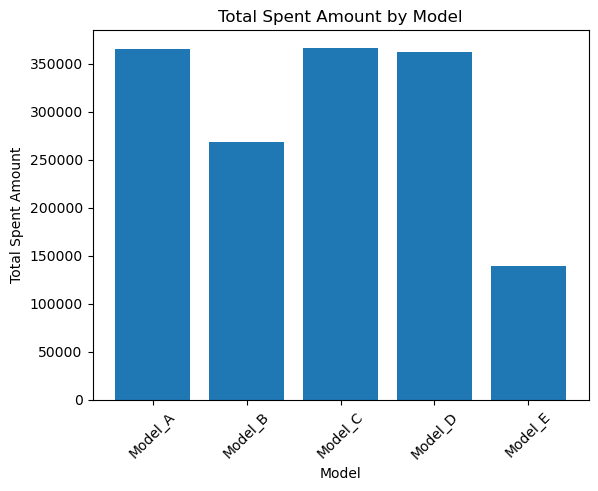

In [6]:
#chart of aggregated values of column spent_amount by column model 
import matplotlib.pyplot as plt

agg_df = df.groupby('model')['spent_amount'].sum().reset_index()
plt.bar(agg_df['model'], agg_df['spent_amount'])
plt.xlabel('Model')
plt.ylabel('Total Spent Amount')
plt.title('Total Spent Amount by Model')
plt.xticks(rotation=45)
plt.show()

Correlation between requests_cnt and spent_amount: 0.9441770579957468


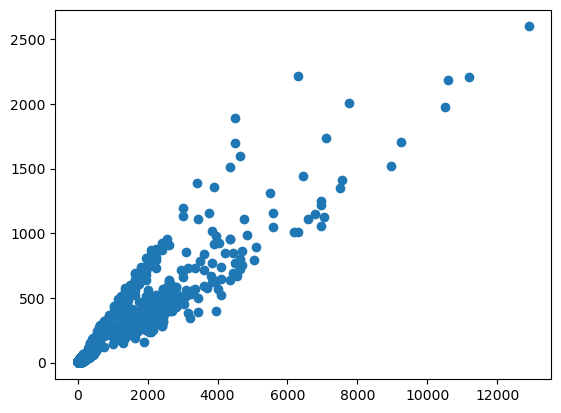

In [11]:
#relationship between spent_amount and requests_cnt
plt.scatter(df['requests_cnt'], df['spent_amount'])

#correlation between spent_amount and requests_cnt
correlation = np.corrcoef(df['requests_cnt'], df['spent_amount'])[0, 1]
print(f'Correlation between requests_cnt and spent_amount: {correlation}')

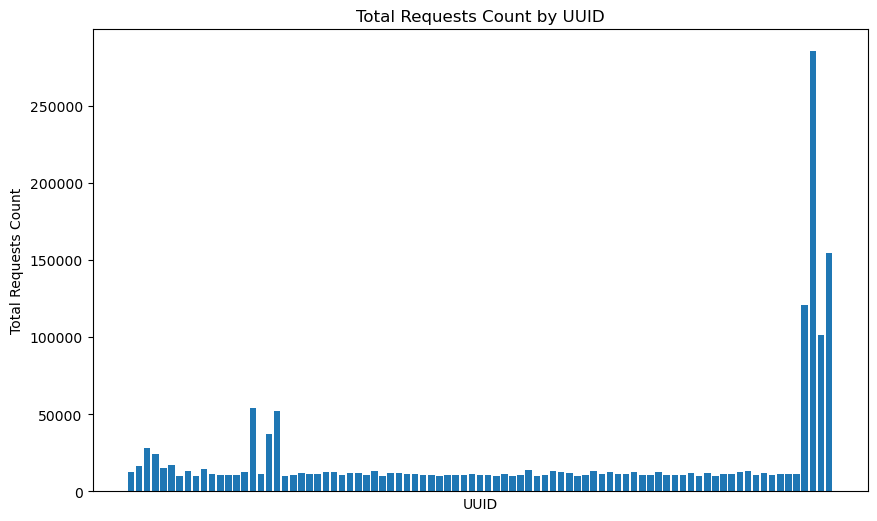

In [15]:
#wykres sumaryczny rozkładu requests_cnt od uuid (pokazywać tylko obserwacje z dużą liczbą requestów)
agg_df2 = df.groupby('uuid')['requests_cnt'].sum().reset_index()
agg_df2 = agg_df2[agg_df2['requests_cnt'] > 10000]  # Przykładowy próg
plt.figure(figsize=(10,6))
plt.bar(agg_df2['uuid'], agg_df2['requests_cnt'])
plt.xlabel('UUID')
plt.ylabel('Total Requests Count')
plt.title('Total Requests Count by UUID')
plt.xticks(ticks =[])
plt.show()

In [17]:
#uuid z największą liczbą requestów
max_requests_uuid = agg_df2.loc[agg_df2['requests_cnt'].idxmax()]
print(f'UUID with the highest number of requests: {max_requests_uuid["uuid"]} with {max_requests_uuid["requests_cnt"]} requests')

UUID with the highest number of requests: user_935 with 285050.0 requests


In [ ]:
#średnia spent_amount per model
model_usage = df.groupby('model')['spent_amount'].mean().reset_index()
print(model_usage)

     model  spent_amount
0  Model_A      9.596685
1  Model_B     11.603898
2  Model_C     15.005187
3  Model_D     14.806012
4  Model_E     10.946868


In [22]:
#porównanie ilości użyć danego modelu dla różnych wartości z kolumny feature (posortowane malejąco według requests_cnt)
feature_usage = df.groupby(['model', 'feature'])['requests_cnt'].sum().reset_index()
feature_usage = feature_usage.sort_values(by='requests_cnt', ascending=False)
print(feature_usage)

      model    feature  requests_cnt
10  Model_C  Feature_1      937253.0
15  Model_D  Feature_1      798043.0
16  Model_D  Feature_2      603601.0
11  Model_C  Feature_2      404161.0
0   Model_A  Feature_1      363290.0
12  Model_C  Feature_3      358344.0
20  Model_E  Feature_1      329741.0
1   Model_A  Feature_2      295124.0
6   Model_B  Feature_2      252778.0
17  Model_D  Feature_3      251417.0
5   Model_B  Feature_1      241452.0
2   Model_A  Feature_3      231346.0
21  Model_E  Feature_2      200811.0
7   Model_B  Feature_3      184196.0
13  Model_C  Feature_4      162050.0
18  Model_D  Feature_4      124580.0
19  Model_D  Feature_5      116509.0
22  Model_E  Feature_3      110376.0
14  Model_C  Feature_5       79988.0
3   Model_A  Feature_4       69566.0
23  Model_E  Feature_4       52162.0
24  Model_E  Feature_5       40711.0
9   Model_B  Feature_5       35448.0
4   Model_A  Feature_5       32607.0
8   Model_B  Feature_4       16497.0


In [28]:
#porównanie ilości użyć danego modelu w zależności od używanej licencji (kolumna license)
#z posdziałem na bloki w zależności od license (posortowane malejąco według requests_cnt)

license_usage = df.groupby(['model', 'license'])['requests_cnt'].sum().reset_index()
license_usage = license_usage.sort_values(by='requests_cnt', ascending=False)
for i in range(len(df['license'].unique())):
    license_block = license_usage[license_usage['license'] == df['license'].unique()[i]]
    print(license_block)

      model  license  requests_cnt
10  Model_C  Premium      676182.0
14  Model_D  Premium      406016.0
2   Model_A  Premium      258014.0
18  Model_E  Premium      206760.0
6   Model_B  Premium      172656.0
      model license  requests_cnt
8   Model_C   Basic      366564.0
12  Model_D   Basic      333519.0
0   Model_A   Basic      181463.0
4   Model_B   Basic      104788.0
16  Model_E   Basic       91789.0
      model     license  requests_cnt
13  Model_D  Enterprise      548537.0
9   Model_C  Enterprise      498204.0
1   Model_A  Enterprise      309526.0
5   Model_B  Enterprise      294919.0
17  Model_E  Enterprise      274188.0
      model   license  requests_cnt
15  Model_D  Standard      606078.0
11  Model_C  Standard      400846.0
3   Model_A  Standard      242930.0
19  Model_E  Standard      161064.0
7   Model_B  Standard      158008.0
